Car sales price predictor using machine learning techniques

##  Importing Required Libraries 

In [1]:
import numpy as np
import pandas as pd 

In [2]:
data=pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum() #NO null values 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
#describing the data
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


The output above shows that there are total of 301 entries in the dataset.

Now We check for outliers in each of the tree columns "Selling_Price", "Present_Price" and the "Driven_kms" , as they are the only columns whose value might have outliers others are just object type so they are basically categorical 

<Axes: ylabel='Selling_Price'>

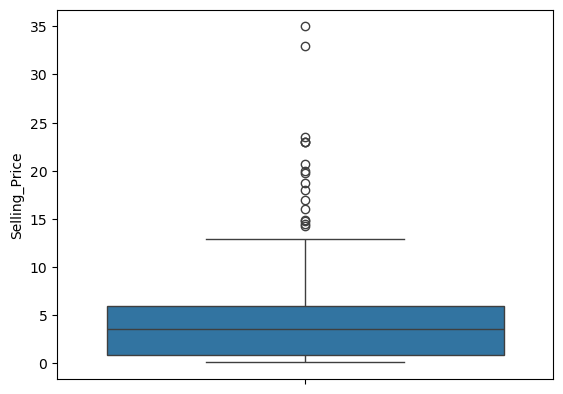

In [8]:
#Checking for out liers 
import seaborn as sns 
sns.boxplot(data['Selling_Price'])

In [9]:
prices = data['Selling_Price']
Q1 = np.percentile(prices, 25)
Q3 = np.percentile(prices, 75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [price for price in prices if price < lower_bound or price > upper_bound]

# Display outliers
print("Outliers:", outliers)
data = data[(data['Selling_Price'] >= lower_bound) & (data['Selling_Price'] <= upper_bound)]

Outliers: [14.9, 23.0, 18.0, 16.0, 19.99, 18.75, 23.5, 33.0, 19.75, 14.25, 14.5, 14.73, 23.0, 35.0, 23.0, 20.75, 17.0]


Checking for outliers for every column on which the price of the car can depend 

In [10]:
prices = data['Present_Price']
Q1 = np.percentile(prices, 25)
Q3 = np.percentile(prices, 75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [price for price in prices if price < lower_bound or price > upper_bound]

# Display outliers
print("Outliers:", outliers)
#removing the outliers from the dataset 

data = data[(data['Present_Price'] >= lower_bound) & (data['Present_Price'] <= upper_bound)]

Outliers: [22.83, 23.73, 22.78]


In [11]:
prices = data['Driven_kms']
Q1 = np.percentile(prices, 25)
Q3 = np.percentile(prices, 75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [price for price in prices if price < lower_bound or price > upper_bound]

# Display outliers
print("Outliers:", outliers)
data = data[(data['Driven_kms'] >= lower_bound) & (data['Driven_kms'] <= upper_bound)]

Outliers: [127000, 135154, 197176, 213000, 500000]


<Axes: ylabel='Selling_Price'>

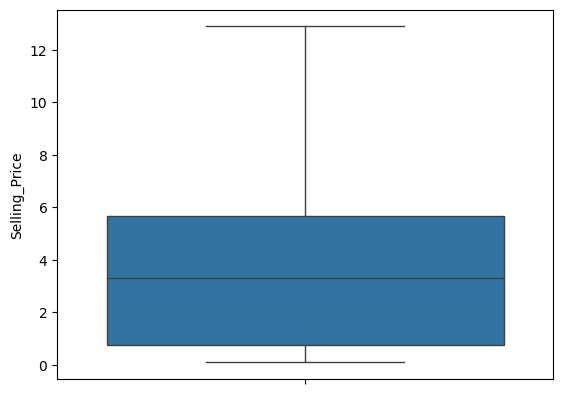

In [12]:
sns.boxplot(data['Selling_Price'])

In [13]:
#checking for outliers in other columns 

<Axes: ylabel='Present_Price'>

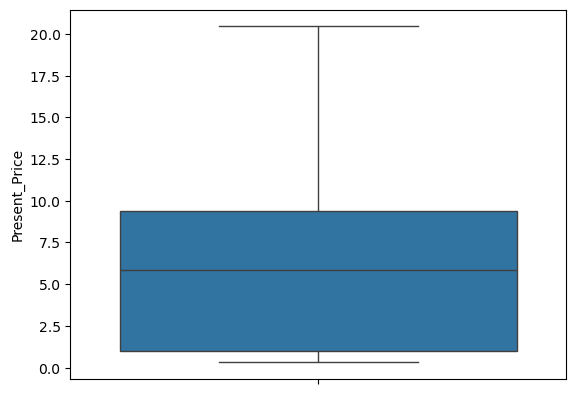

In [14]:
sns.boxplot(data['Present_Price'])

<Axes: ylabel='Driven_kms'>

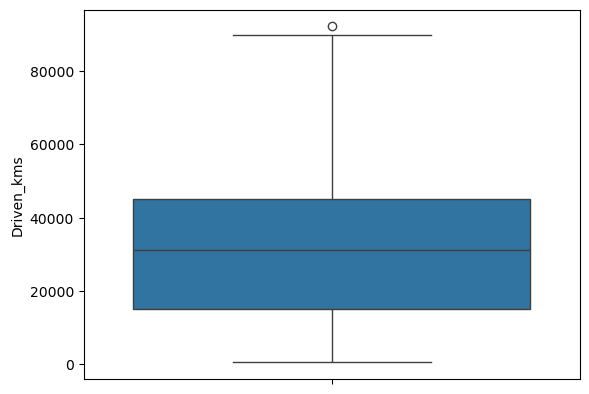

In [15]:
sns.boxplot(data['Driven_kms'])

Now all the columns have been dealt with , of having outliers now , we calculate age of cars , using the year and current year 

In [16]:
data['Age'] = 2024 - data['Year']

In [17]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [18]:
data.drop('Year',axis=1,inplace=True)

In [19]:
data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [20]:
data.shape

(276, 9)

Previously it was 301 now it is reduced to 275 entries , so we have removed some outliers 

In [21]:
#Using labelEncoder to encode the columns numerically 
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
columns_to_encode = ['Fuel_Type','Selling_type','Transmission']

for column in columns_to_encode:
    data[column] = labelEncoder.fit_transform(data[column])
    
print(data.sample(5))

                 Car_Name  Selling_Price  Present_Price  Driven_kms  \
22                    sx4           4.40           8.01       50000   
144  Bajaj Pulsar  NS 200           0.60           0.99       25000   
41               alto k10           2.55           3.98       46706   
156            TVS Sport            0.48           0.52       15000   
254                  city           5.25           9.90       54242   

     Fuel_Type  Selling_type  Transmission  Owner  Age  
22           2             0             0      0   13  
144          2             1             1      0   10  
41           2             0             1      0   10  
156          2             1             1      0    7  
254          2             0             1      0   11  


## Model Building 

Assigning the train and test part of the data for training and testing of the model

In [22]:
X = data.drop(['Car_Name','Selling_Price'],axis =1)
y = data['Selling_Price']

In [23]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 276, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

In [28]:
from sklearn import metrics

In [29]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [30]:
print(score1,score2,score3,score4)

0.8397816644317382 0.9432216736173096 0.9574683172164175 0.9501896602761679


In [31]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],"R2_score":[score1,score2,score3,score4]})

In [32]:
final_data

,Models,R2_score
0,LR,0.839782
1,RF,0.943222
2,GBR,0.957468
3,XG,0.950190


Plotting the results of all the four models 

<Axes: xlabel='Models', ylabel='R2_score'>

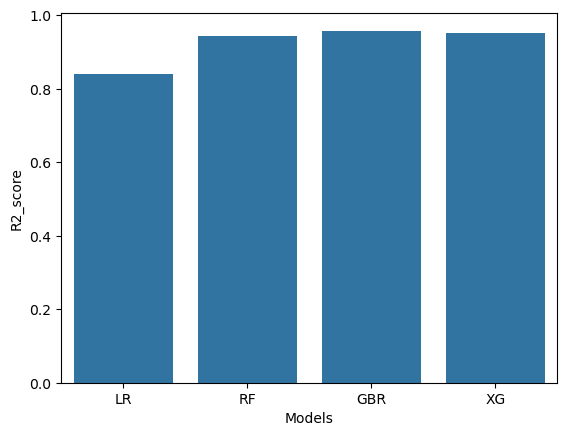

In [33]:
sns.barplot(x=final_data['Models'],y=final_data['R2_score'])

The best model out of the three is GBR (Gradient Boosting Regressor ) , which has the R2_score of 0.9591 (highest of all 4).

So that is selected as the model by which all the prediction will be done.

### Saving the Model 

In [34]:
#saving the best model out of the four 
xgb = GradientBoostingRegressor()
xg_final =xg.fit(X,y)

In [35]:
import joblib
joblib.dump(xg_final,'car_price_predictor')
model = joblib.load('car_price_predictor')

## Predicting using input from user

In [ ]:
from tkinter import *
import joblib

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    
    model = joblib.load('car_price_predictor')
    data_new = pd.DataFrame({
    'Present_Price':p1,
    'Driven_kms':p2,
    'Fuel_Type':p3,
    'Selling_type':p4,
    'Transmission':p5,
    'Owner':p6,
    'Age':p7
},index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Car Purchase amount", result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning")

master.geometry("400x300")


label = Label(master, text = "Car Price Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Present_Price").grid(row=1)
Label(master, text="Driven_kms").grid(row=2)
Label(master, text="Fuel_Type").grid(row=3)
Label(master, text="Selling_type").grid(row=4)
Label(master, text="Transmission").grid(row=5)
Label(master, text="Owner").grid(row=6)
Label(master, text="Age").grid(row=7)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Car Purchase amount 1.6414396
